In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

b'2017-09-29 14:18:38 -0400 (bbb2b427cdfd3d3fc1a626fa4fa5404882cc9820)'


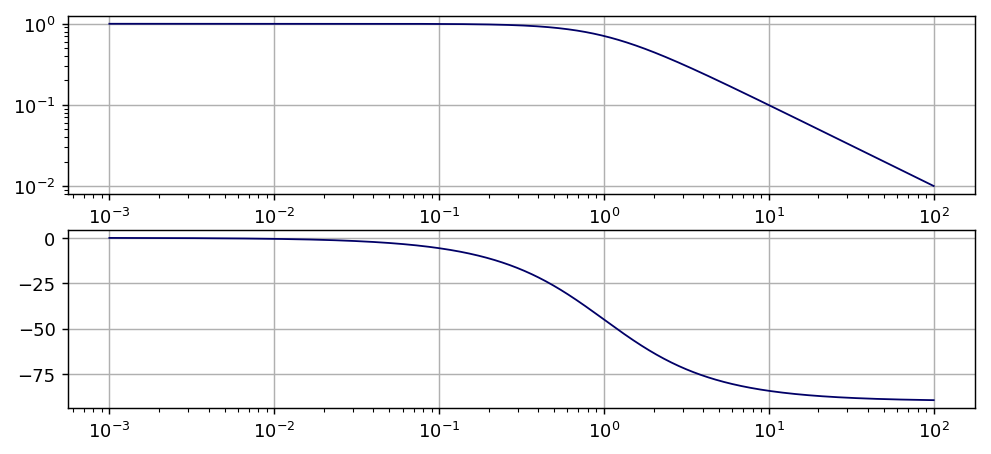

In [4]:
sys = system.BGSystem(
    F_AC = logspaced(0.001, 100, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    poles_r = (-1, ),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

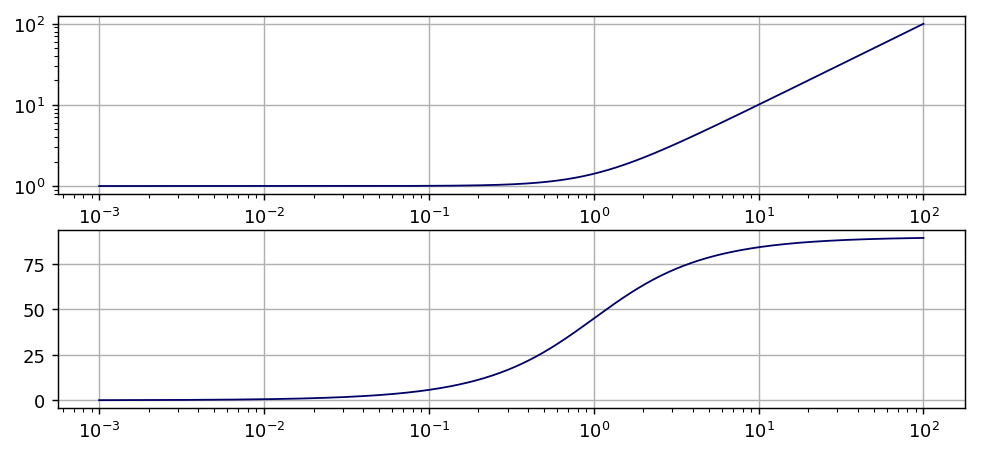

In [5]:
sys = system.BGSystem(
    F_AC = logspaced(0.001, 100, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    zeros_r = (-1, ),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

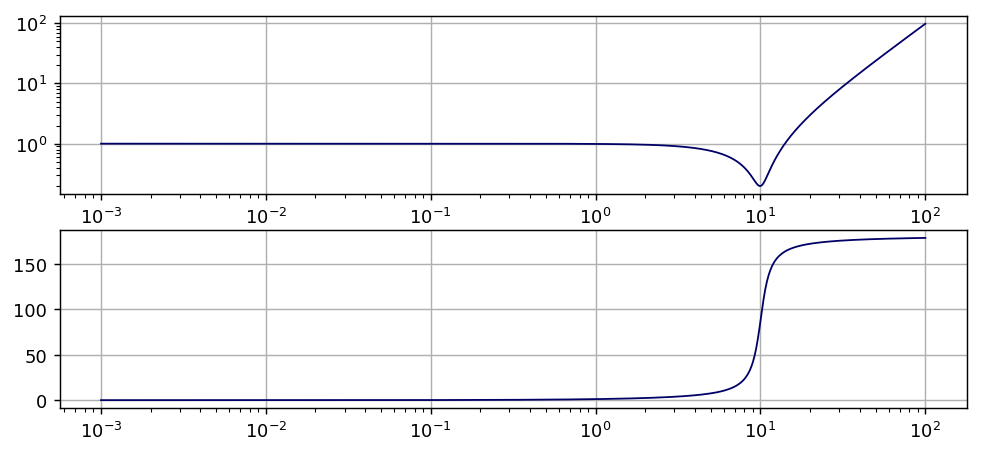

In [6]:
sys = system.BGSystem(
    F_AC = logspaced(0.001, 100, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    zeros_c = (-1 + 10j, ),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

F_cutoff: .inf
F_cutoff_low: 0
delay: {units: second, val: 0}
gain: 1
no_DC: false
preserve_plane: true
zeros_r: {'0': -10, '1': -10}



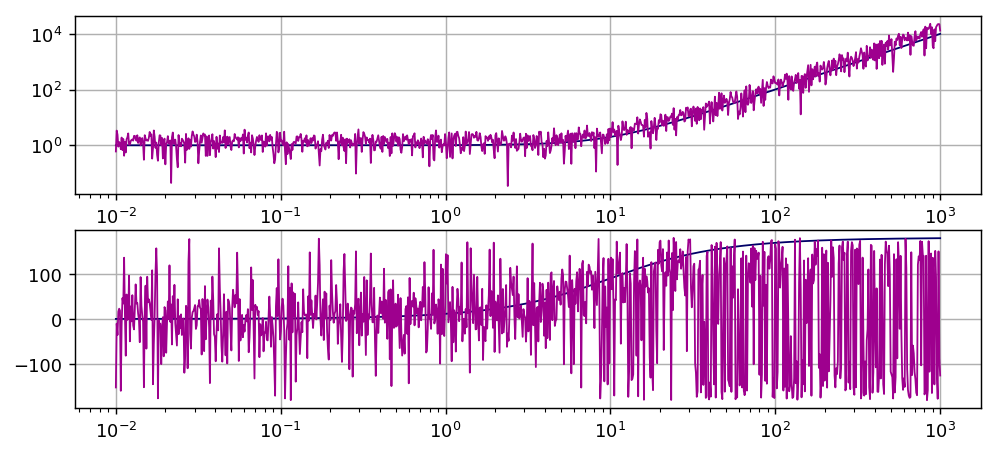

In [7]:
sys = system.BGSystem(
    F_AC = logspaced(0.01, 1000, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    #poles_c = (-2 - 10j, ),
    zeros_r = (-10, -10),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

size = len(readoutI.F_Hz.val)
relscale = .9
AC_data = readoutI.AC_sensitivity * (1 
                                     + np.random.normal(0, relscale, size) 
                                     + 1j*np.random.normal(0, relscale, size))
Fb.ax0.loglog(readoutI.F_Hz.val, abs(AC_data))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(AC_data, deg = True))
sysO = sys
print(sys.X1.ctree_as_yaml())


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



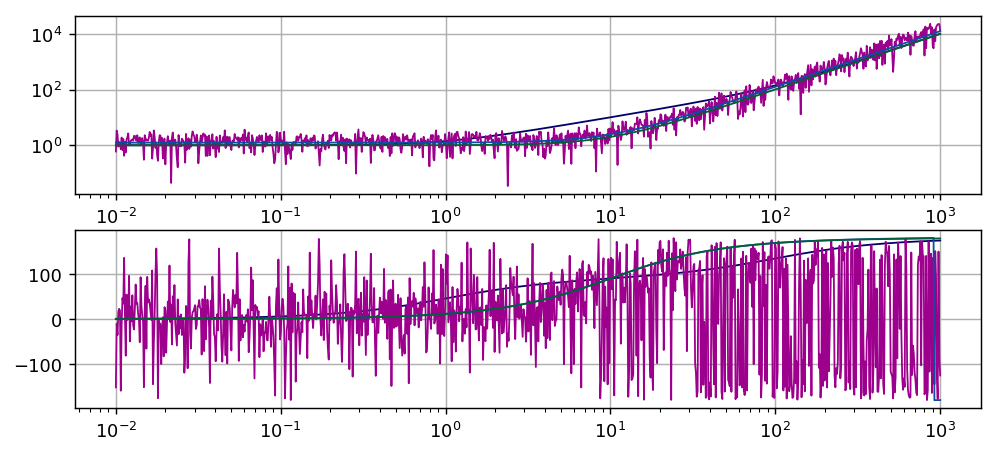

In [8]:
import phasor.fitting.casadi as FIT
import phasor.fitting.casadi.transfer_functions as FIT_TF

froot = FIT.FitterRoot()
froot.own.sym = FIT.FitterSym()

sys = system.BGSystem(
    F_AC = logspaced(0.01, 1000, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    #poles_c = (-2 - 10j, ),
    zeros_r = (-1, -100),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

froot.systems.xfer = sys
froot.sym.parameter(sys.X1)
froot.own.residual = FIT_TF.TransferACExpression(
    ACData = AC_data,
    ACReadout = sys.R1,
    SNR_weights = 1/relscale,
)
minny = froot.residual.minimize_function()

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
Fb.ax0.loglog(readoutI.F_Hz.val, abs(AC_data))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(AC_data, deg = True))
readoutI =  minny.systems.xfer.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
readoutI =  sysO.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

In [9]:
import casadi

In [10]:
casadi.MX.ones(10)
casadi.MX.ones(10).shape

(10, 1)

In [11]:
casadi.dot(casadi.MX.ones(10), casadi.MX.ones(10))

MX(10)